In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('HousePricePrediction.xlsx')
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [3]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/6w/f7hqt7x93w57k81v_3hn3wtm0000gn/T/ipykernel_23958/1830991542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


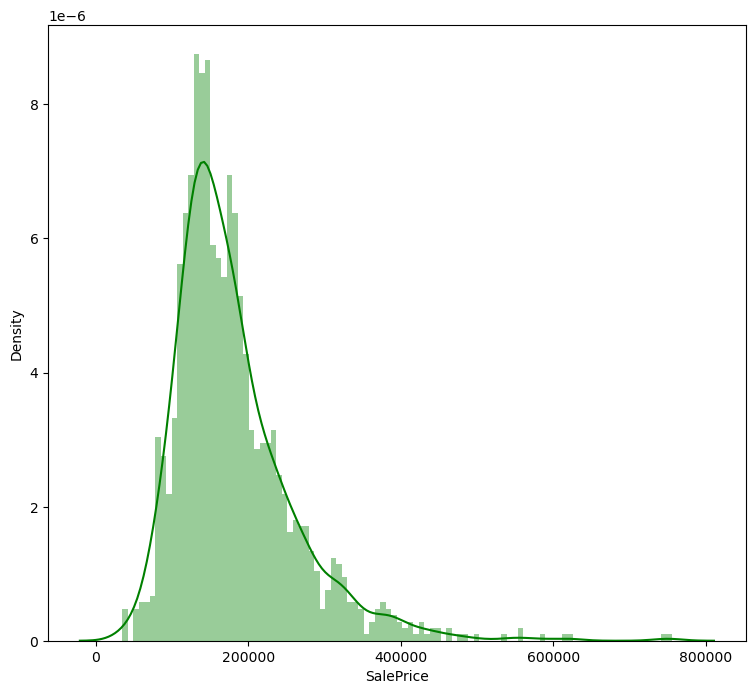

In [5]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [6]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [7]:
data = data.dropna()
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [8]:
data.drop('Id', axis=1, inplace=True)
data.drop('BsmtFinSF2', axis=1, inplace=True)

/var/folders/6w/f7hqt7x93w57k81v_3hn3wtm0000gn/T/ipykernel_23958/602303886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Id', axis=1, inplace=True)
/var/folders/6w/f7hqt7x93w57k81v_3hn3wtm0000gn/T/ipykernel_23958/602303886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('BsmtFinSF2', axis=1, inplace=True)


In [9]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1078.0,142125.0


In [10]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [11]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,856.0,208500.0
1,20,9600,8,1976,1976,1262.0,181500.0
2,60,11250,5,2001,2002,920.0,223500.0
3,70,9550,5,1915,1970,756.0,140000.0
4,60,14260,5,2000,2000,1145.0,250000.0


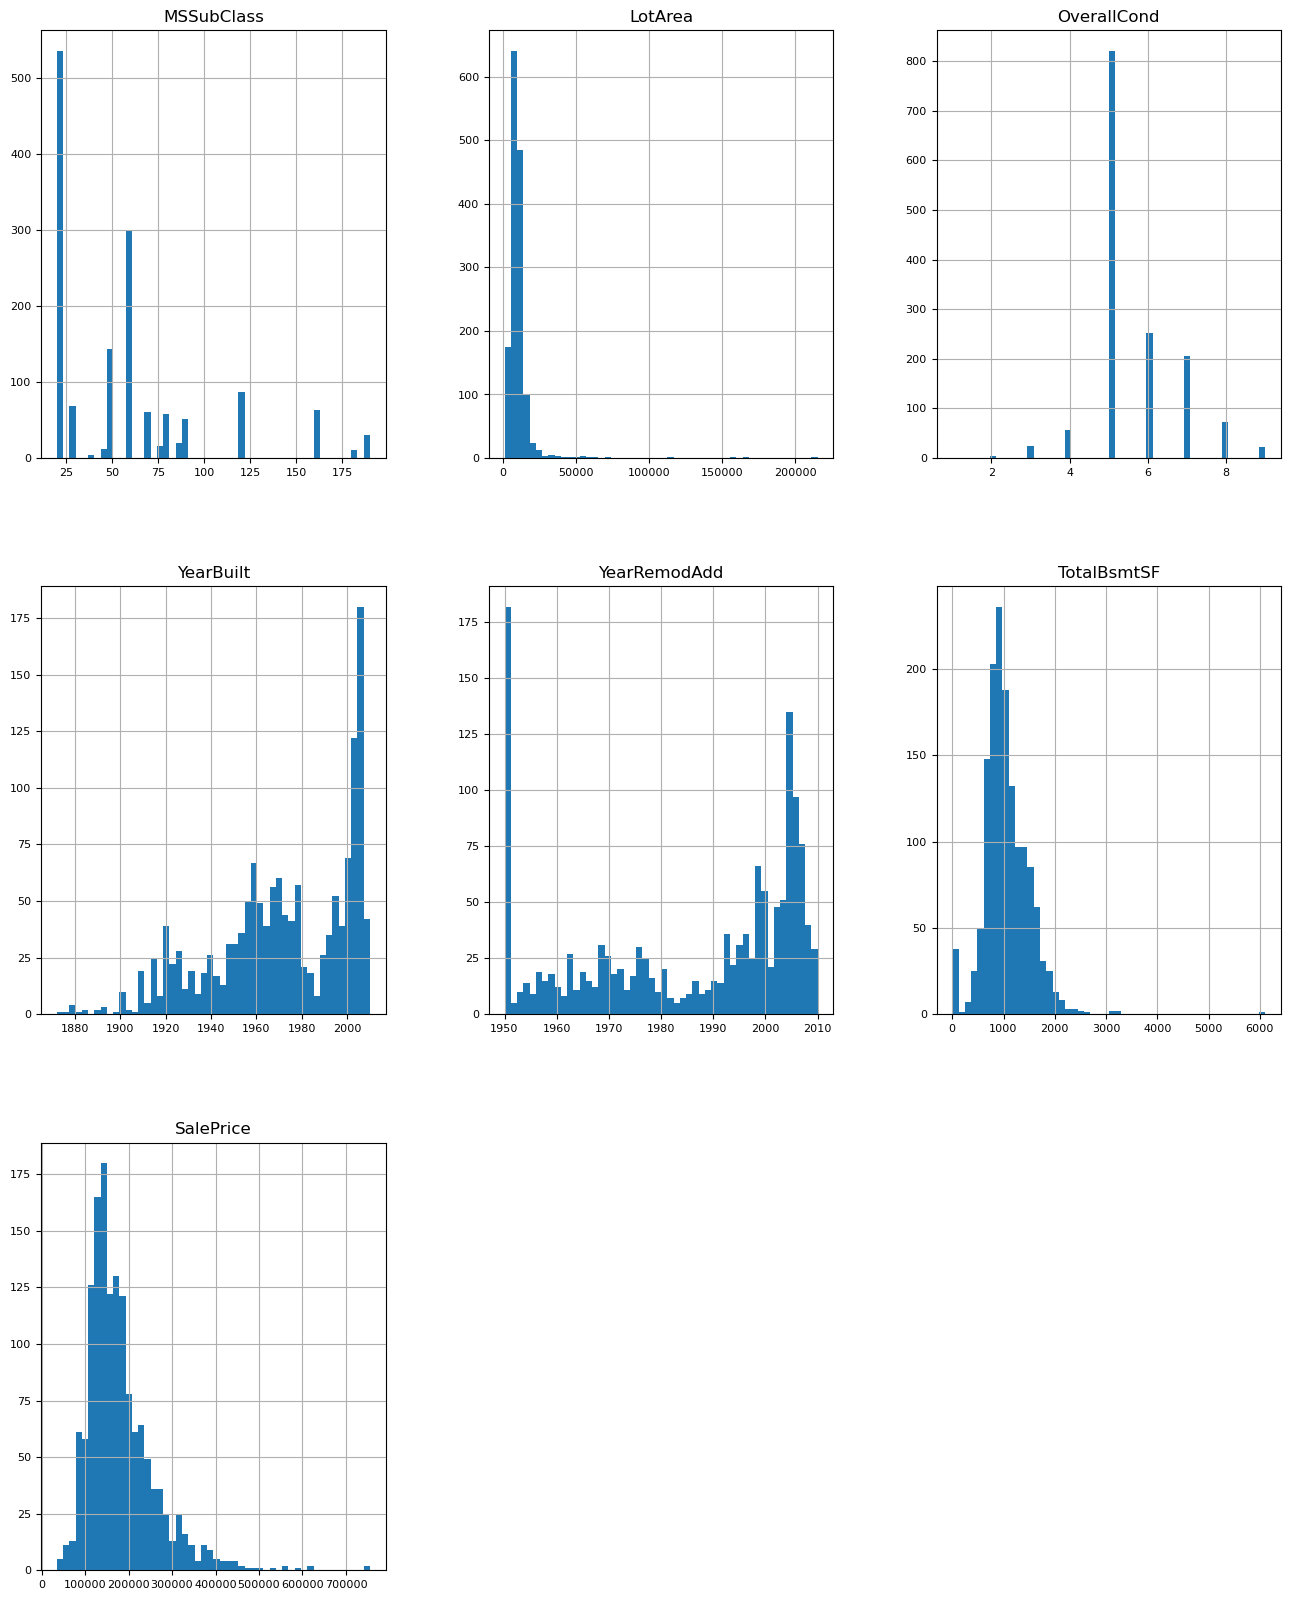

In [12]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

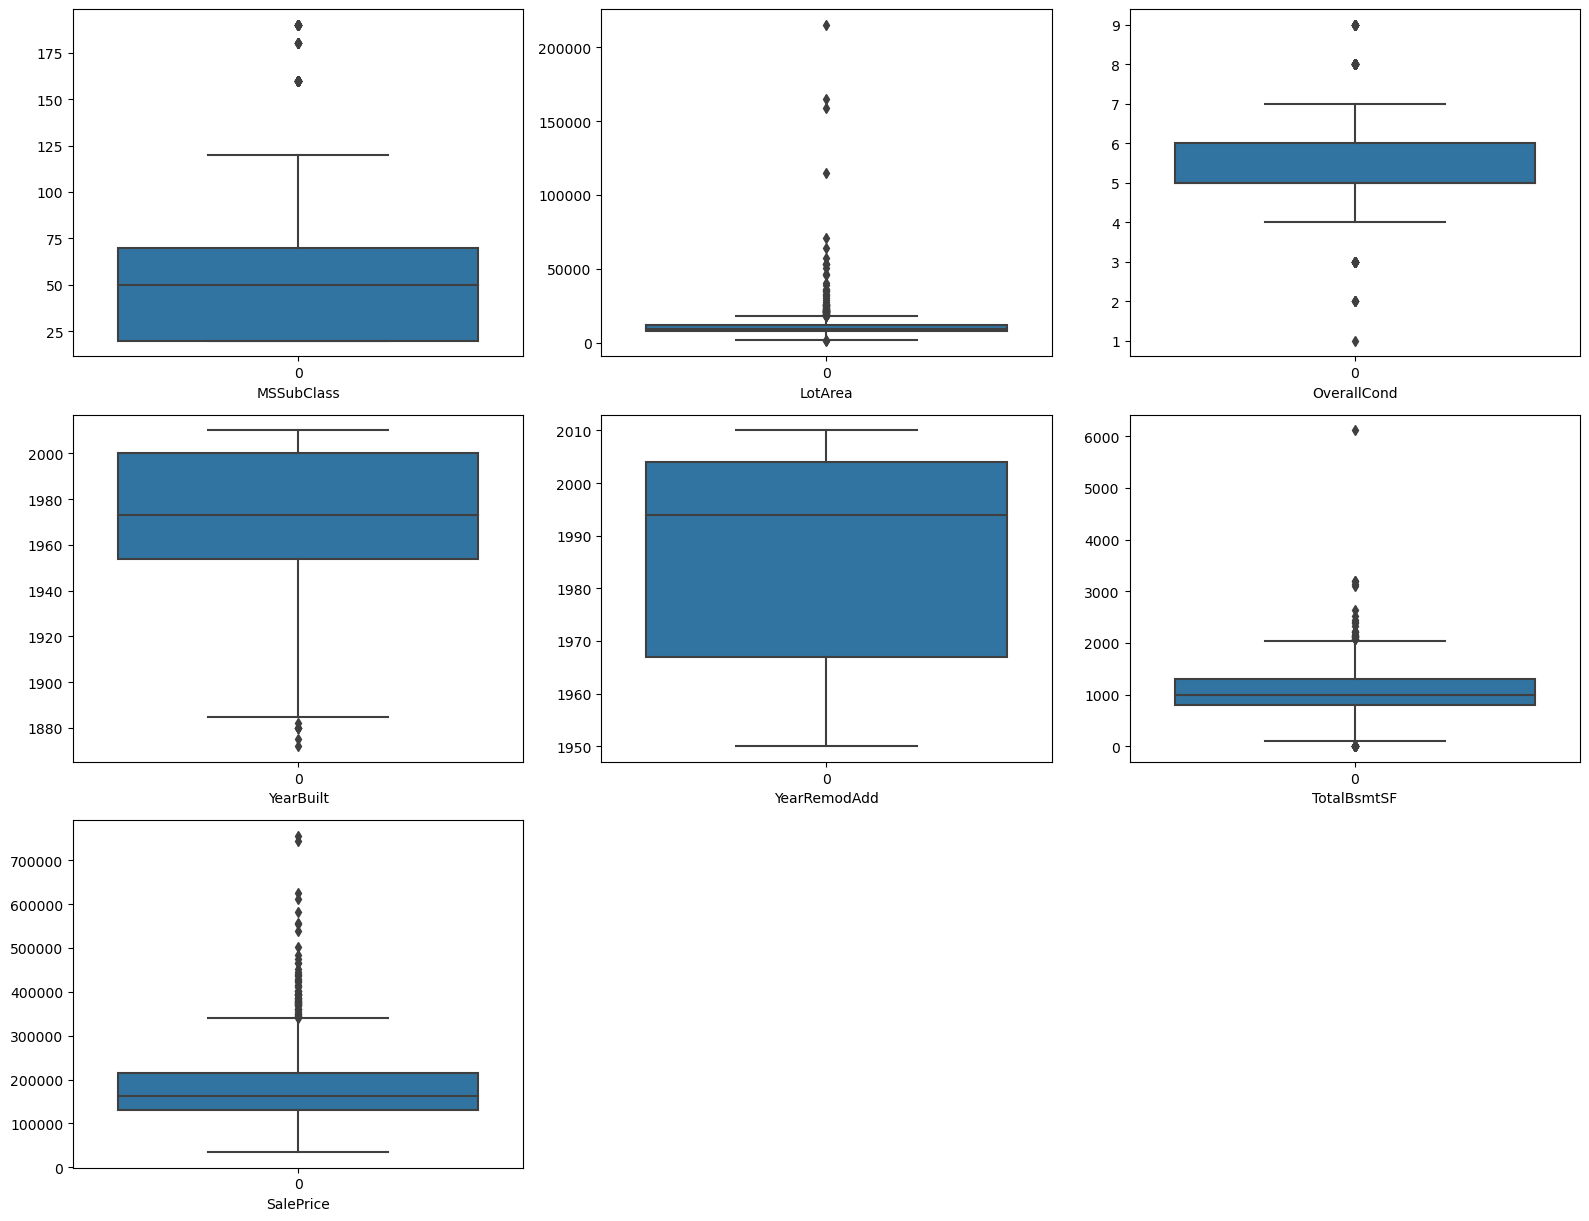

In [13]:
# Plot the boxplots
plt.figure(figsize=(16, 20))
for i, column in enumerate(data_num.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data_num[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [14]:
### Identifying outliers

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set a threshold for identifying outliers (e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
outlier_threshold = 1.5

# Identify outliers
outliers = data[(data < Q1 - outlier_threshold * IQR) | (data > Q3 + outlier_threshold * IQR)]

# Print the outliers
print(outliers.notnull().sum())

MSSubClass      103
MSZoning          0
LotArea          69
LotConfig         0
BldgType          0
OverallCond     125
YearBuilt         7
YearRemodAdd      0
Exterior1st       0
TotalBsmtSF      61
SalePrice        61
dtype: int64


/var/folders/6w/f7hqt7x93w57k81v_3hn3wtm0000gn/T/ipykernel_23958/4191370966.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
/var/folders/6w/f7hqt7x93w57k81v_3hn3wtm0000gn/T/ipykernel_23958/4191370966.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
/var/folders/6w/f7hqt7x93w57k81v_3hn3wtm0000gn/T/ipykernel_23958/4191370966.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < Q1 - outlier_t

In [15]:
data = data[~outliers.any(axis=1)]
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,856.0,208500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,1145.0,250000.0
5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,796.0,143000.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,7500,Inside,1Fam,5,2004,2005,VinylSd,1221.0,185000.0
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,1542.0,210000.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1078.0,142125.0


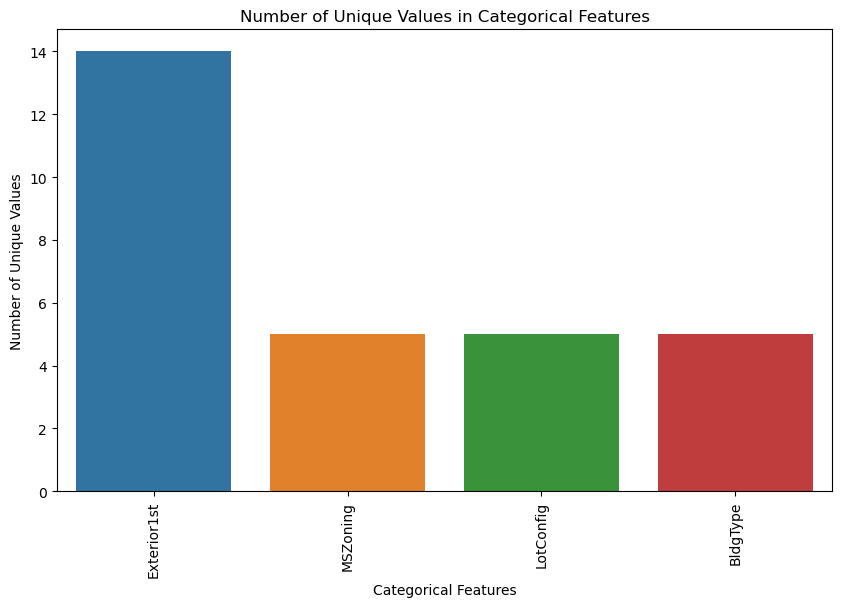

In [16]:
categorical_columns = data.select_dtypes(include='object').columns
unique_values = data[categorical_columns].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.xticks(rotation=90)
plt.xlabel('Categorical Features')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Categorical Features')

plt.show()

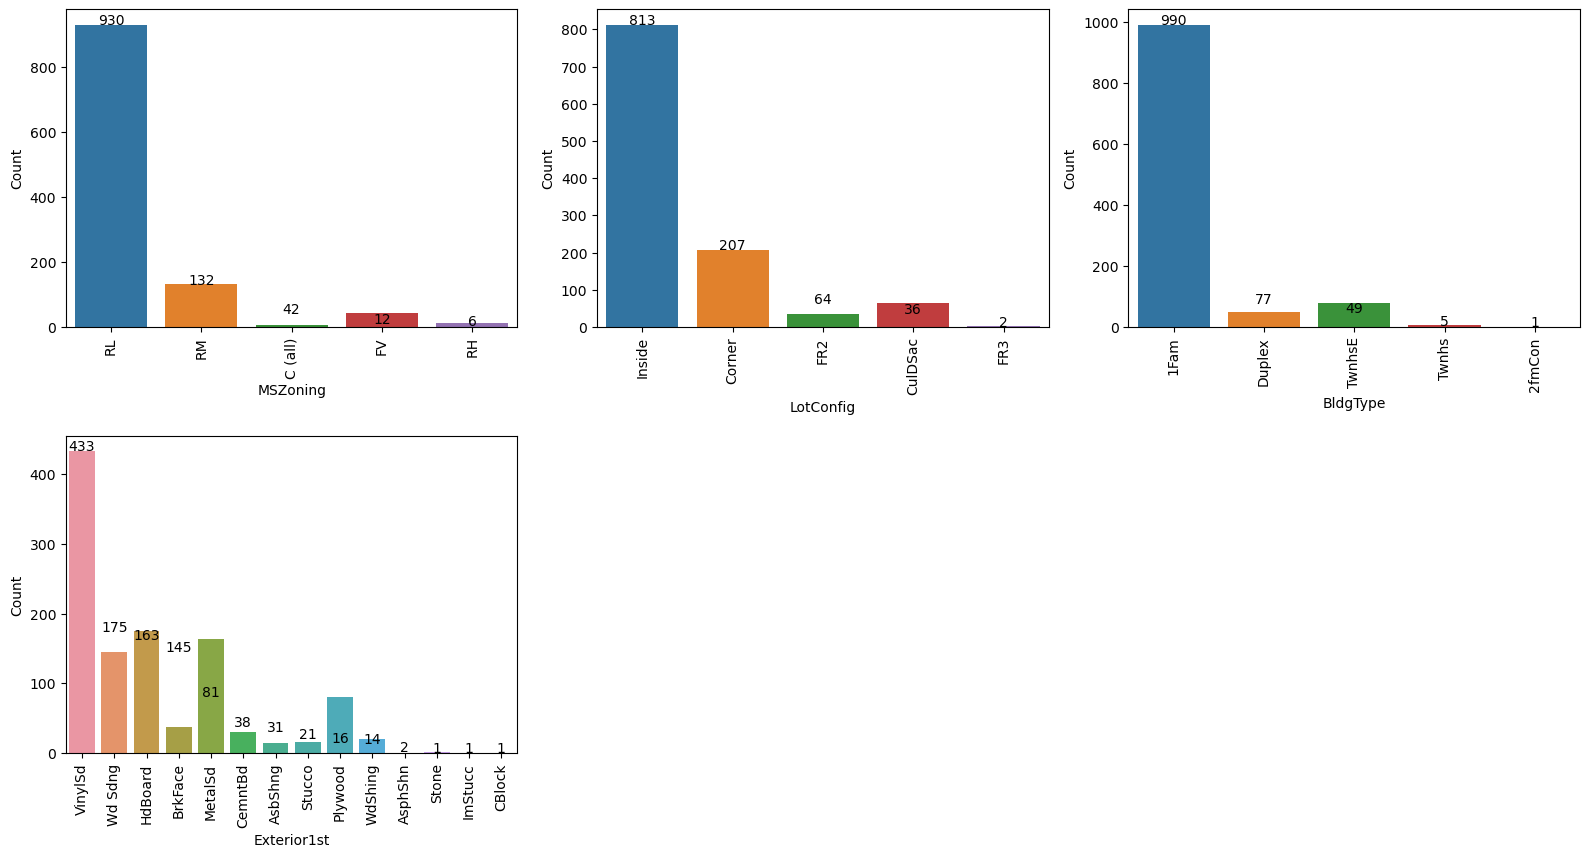

In [17]:
# Select the categorical columns

# Plot bar charts with value counts for each categorical column
plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data, x=column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    # Display the count of each category
    value_counts = data[column].value_counts().reset_index()
    for index, row in value_counts.iterrows():
        plt.text(index, row[column], f'{row[column]}', ha='center')
        
plt.tight_layout()
plt.show()

In [18]:
# Select the categorical columns for one-hot encoding
categorical_columns = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns)

# Print the encoded data
print(data)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0             60     8450            5       2003          2003        856.0   
2             60    11250            5       2001          2002        920.0   
3             70     9550            5       1915          1970        756.0   
4             60    14260            5       2000          2000       1145.0   
5             50    14115            5       1993          1995        796.0   
...          ...      ...          ...        ...           ...          ...   
1454          20     7500            5       2004          2005       1221.0   
1455          60     7917            5       1999          2000        953.0   
1456          20    13175            6       1978          1988       1542.0   
1458          20     9717            6       1950          1996       1078.0   
1459          20     9937            6       1965          1965       1256.0   

      SalePrice  MSZoning_C (all)  MSZo

              MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
MSSubClass      1.000000  0.301401     0.148080   0.137441      0.114985   
LotArea         0.301401  1.000000     0.029864   0.148551      0.093762   
OverallCond     0.148080  0.029864     1.000000   0.441415      0.122080   
YearBuilt       0.137441  0.148551     0.441415   1.000000      0.689773   
YearRemodAdd    0.114985  0.093762     0.122080   0.689773      1.000000   
TotalBsmtSF     0.124775  0.203111     0.213510   0.437033      0.335316   
SalePrice       0.112176  0.358668     0.211748   0.663723      0.596915   

              TotalBsmtSF  SalePrice  
MSSubClass       0.124775   0.112176  
LotArea          0.203111   0.358668  
OverallCond      0.213510   0.211748  
YearBuilt        0.437033   0.663723  
YearRemodAdd     0.335316   0.596915  
TotalBsmtSF      1.000000   0.575566  
SalePrice        0.575566   1.000000  


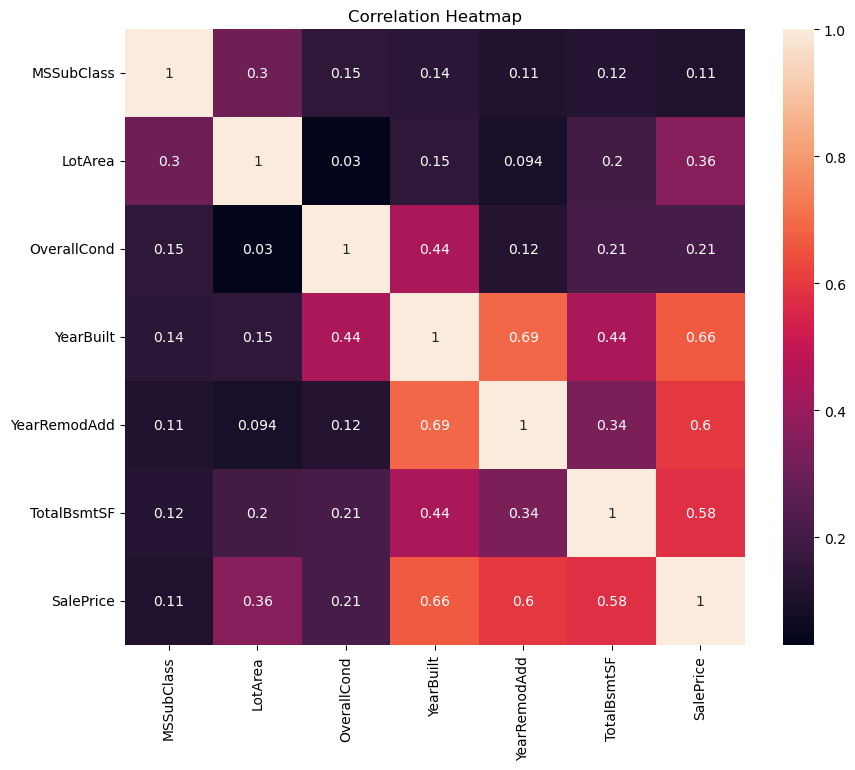

In [19]:
# Select the numerical columns for the heatmap
numerical_columns = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'SalePrice']


# Create a correlation matrix of the numerical columns
correlation_matrix = data[numerical_columns].corr().abs()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

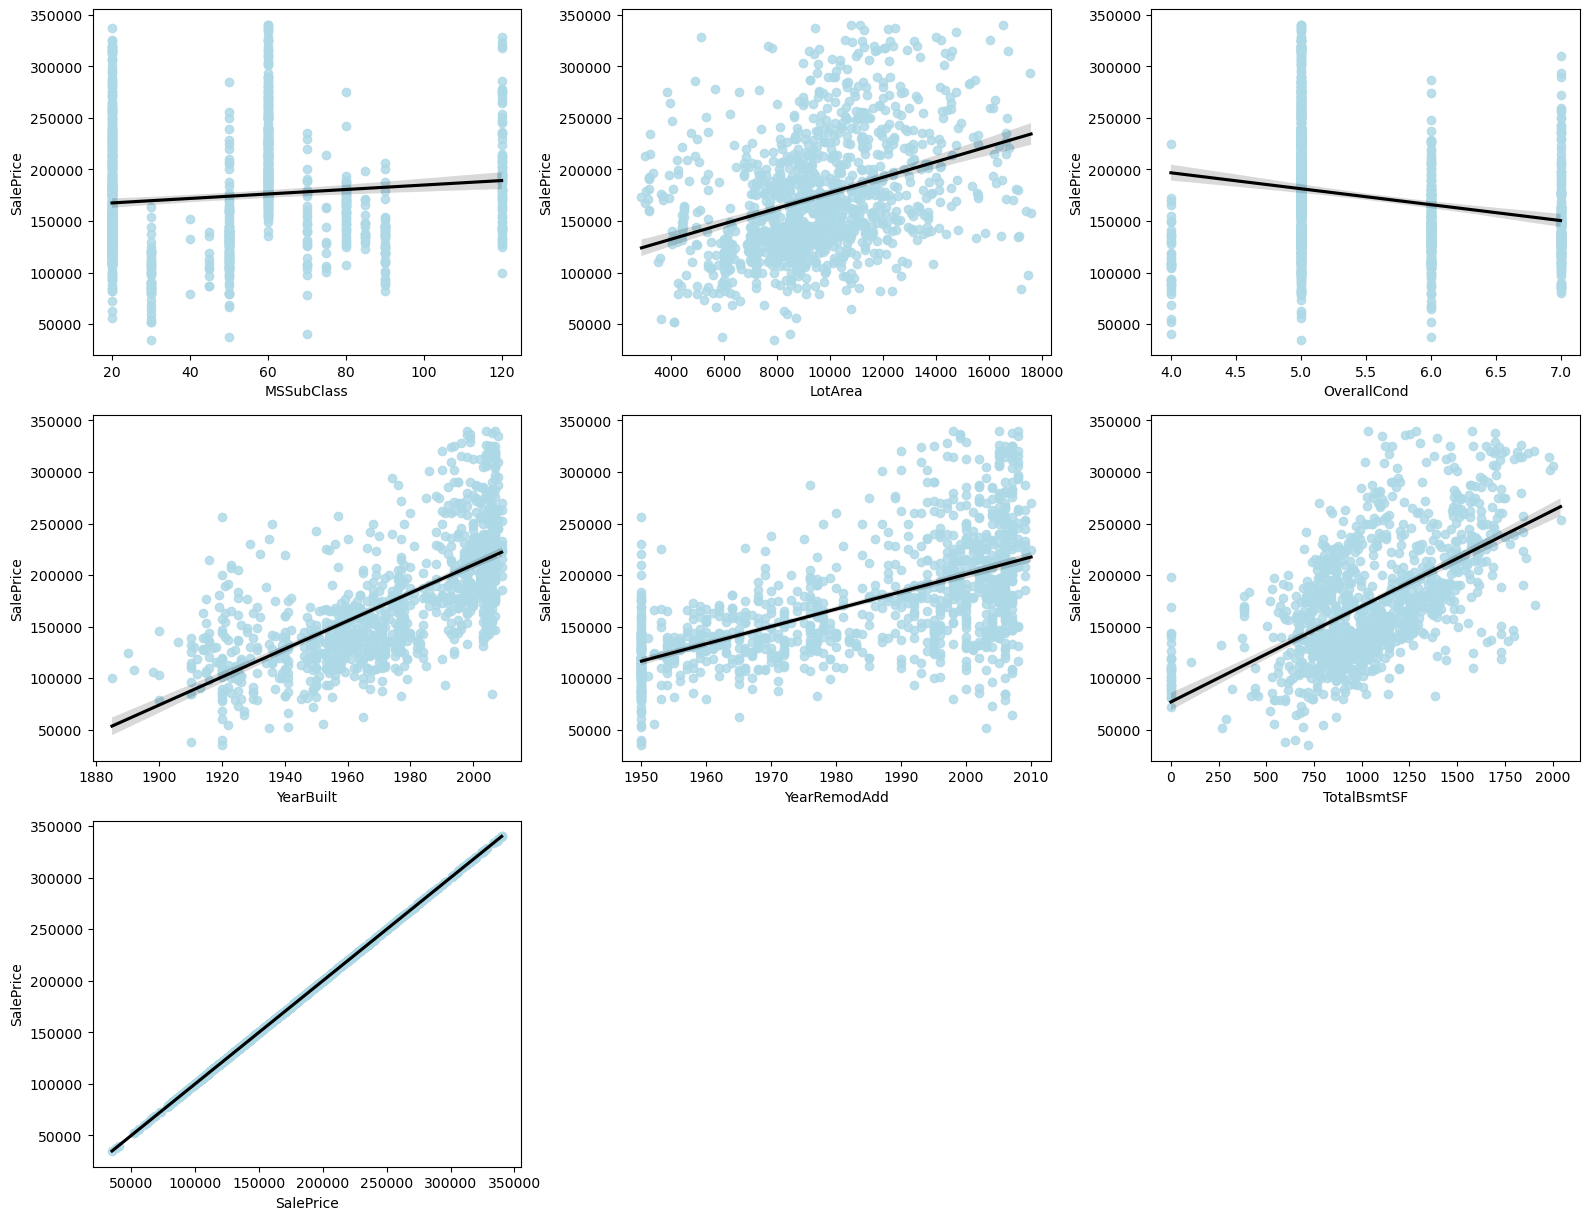

In [20]:
plt.figure(figsize=(16, 20))
for i, column in enumerate(data_num.columns):
    plt.subplot(5, 3, i+1)
    sns.regplot(data=data, x=column, y='SalePrice', scatter_kws={'color':'lightblue'},line_kws={'color':'black'})
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

### Linear Regression with one independent variable

In [22]:
# Split the data into features (X) and target variable (y)
X = data['YearBuilt'].values.reshape(-1, 1) # Features
y = data['SalePrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Print the R-squared score
print("R-squared:", r2)

R-squared: 0.4849004324758227


In [34]:
# Split the data into features (X) and target variable (y)
X = data['YearRemodAdd'].values.reshape(-1, 1)  # Features
y = data['SalePrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Print the R-squared score
print("R-squared:", r2)

R-squared: 0.41511729301374933


### Random forest regressor in one indepndent variable

R-squared: 0.4872969444131162


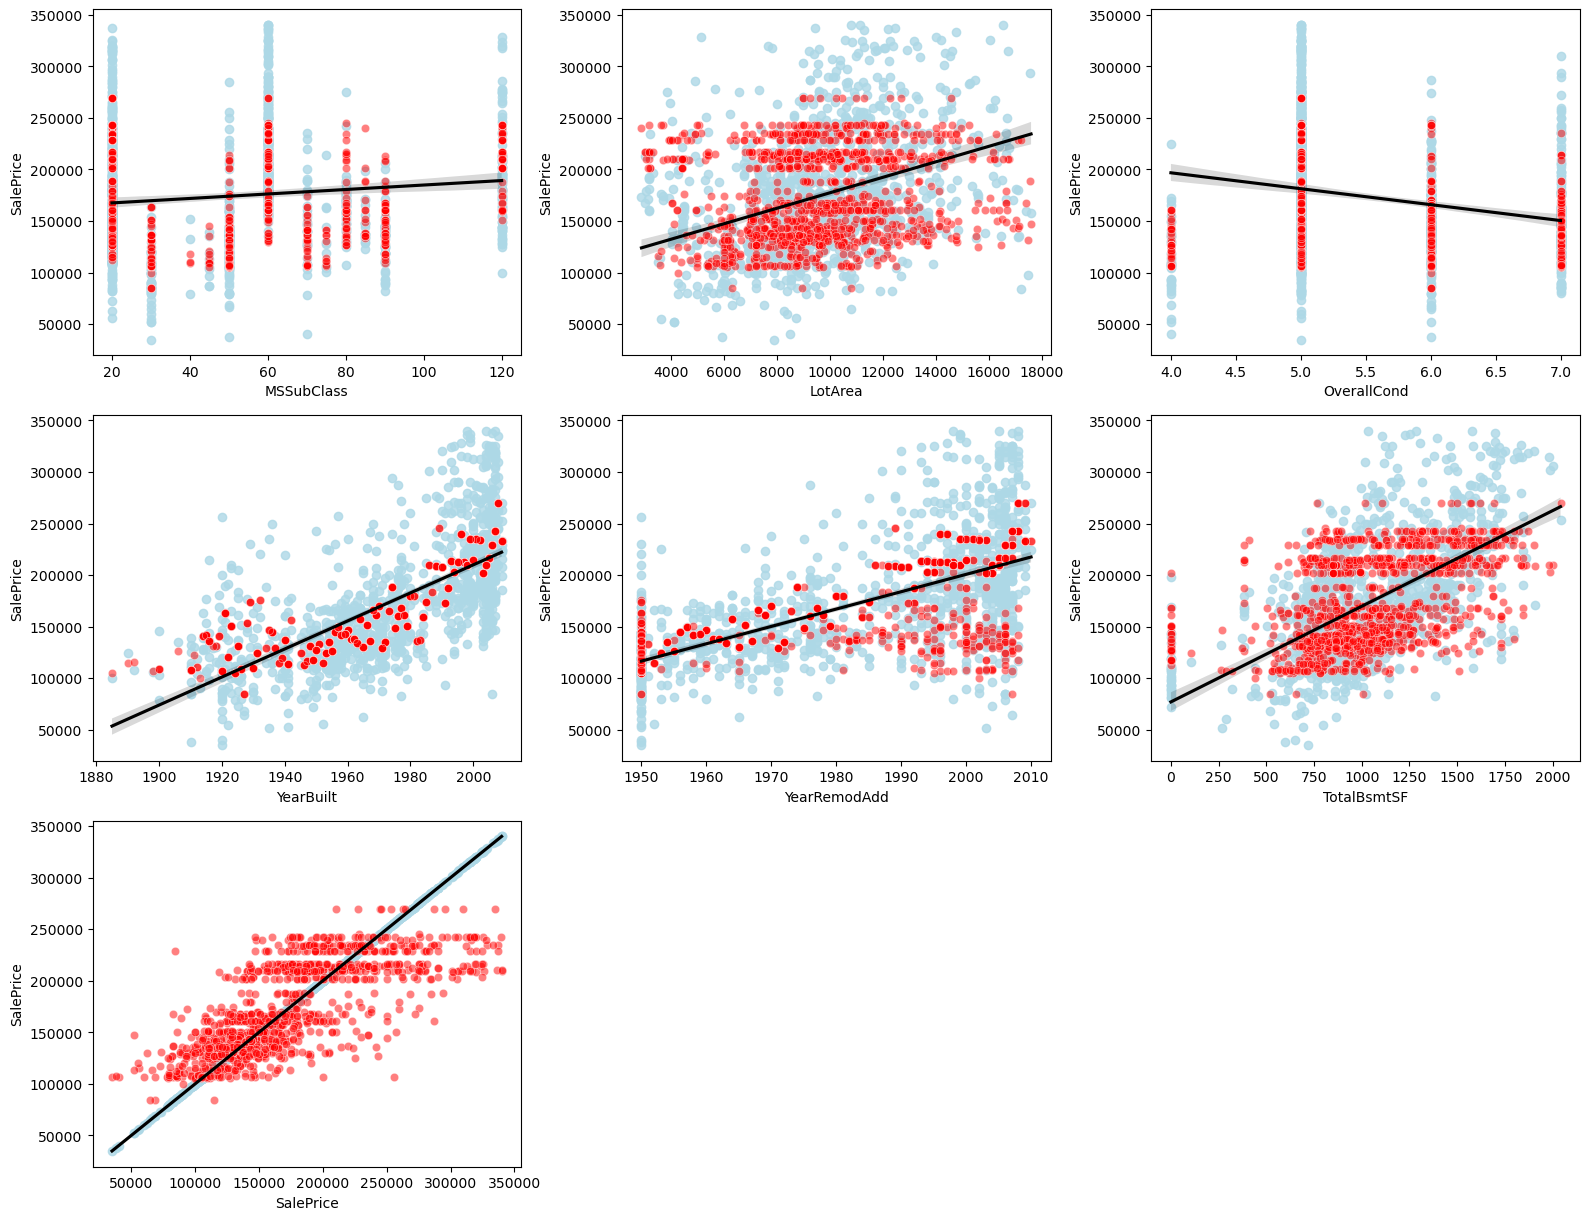

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into features (X) and target variable (y)
X = data['YearBuilt'].values.reshape(-1, 1)  # Features
y = data['SalePrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared:", r2)

In [33]:
# Split the data into features (X) and target variable (y)
X = data['YearRemodAdd'].values.reshape(-1, 1)  # Features
y = data['SalePrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared:", r2)

R-squared: 0.3921693547814845


### Random forest Regressor with all independent variables

In [24]:
# Split the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)  # Features
y = data['SalePrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared:", r2)

R-squared: 0.8255152475988551


### Linear Regression with all independent variables

In [25]:
# Split the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)  # Features
y = data['SalePrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Print the R-squared score
print("R-squared:", r2)

R-squared: 0.7514824166135302
